In [32]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
df=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [34]:
#Show the dataframe shape

df.shape

#Check the data types of the columns

df.dtypes

# Get the numeric data into dataframe called numerical 

numerical = df.select_dtypes(include=np.number)

# Get the categorical data into dataframe called categorical 

categorical = df.select_dtypes(include=np.object)

In [35]:
df = df.rename(columns = {'Customer':'customer'})
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [36]:
#Which columns are numerical?

X_num = df.select_dtypes(include='number')#drop('Total Claim Amount', axis=1)

#Which columns are categorical?

X_cat = df.select_dtypes(include='object')

In [37]:
#Check and deal with NaN values

df.fillna(' ',inplace=True)

In [38]:
#Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: 
#If data from March does not exist, consider only January and February

df['month']=pd.DatetimeIndex(df['effective_to_date']).month
df['month'].value_counts() #There are only January and February in the dataframe
first_quartile=df[df['month'].between(1,4)]
df['month'] = df['month'].apply(str) #We convert datatime time format to string
df.drop(['month'],axis=1,inplace=True)

In [39]:
#BONUS: Put all the previously mentioned data transformations into a function 

def my_func(df):
    
#Show the dataframe shape
    df.shape

#Standardize header names

    df=df.rename({'State':'ST', 'Gender':'GENDER'}, axis=1)

#Which columns are numerical?

    df.select_dtypes(include=np.number)

#Which columns are categorical?

    df.select_dtypes(include=['object'])

#Check and deal with NaN values

    df.fillna(' ',inplace=True)

#Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: 
#If data from March does not exist, consider only January and February

    df['month']=pd.DatetimeIndex(df['effective_to_date']).month
    df['month'].value_counts() #There are only January and February in the dataframe
    first_quartile=df[df['month'].between(1,4)]
    df['month'] = df['month'].apply(str) #We convert datatime time format to string
    df.drop(['month'],axis=1,inplace=True)
    return df



df = my_func(df)

In [40]:
#Describe DataFrame

df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:xlabel='response'>

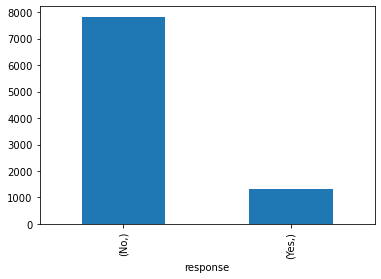

In [41]:
#Show a plot of the 'Total Number of Responses'

data = df[['response']].value_counts()
data.plot(kind='bar')

<AxesSubplot:xlabel='response'>

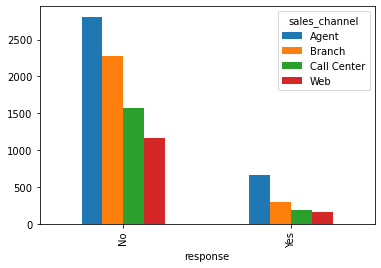

In [42]:
#Show a plot of the response rate by the sales channel

data=df
data=data.groupby(['response','sales_channel']).size()
data=data.unstack()
data.plot(kind='bar')

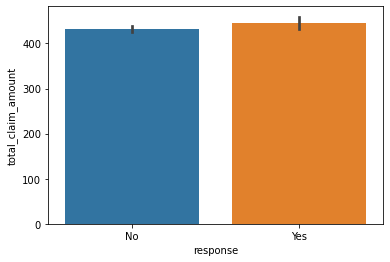

In [43]:
#Show a plot of the response rate by the total claim amount

sns.barplot(x='response', y='total_claim_amount', data=df)
plt.show()

<AxesSubplot:xlabel='response', ylabel='income'>

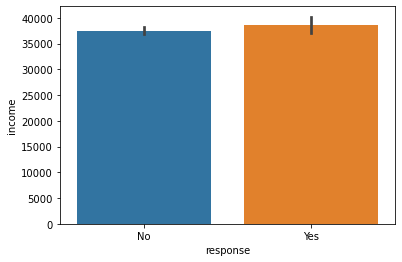

In [44]:
#Show a plot of the response rate by income

sns.barplot(x='response', y='income', data=df)

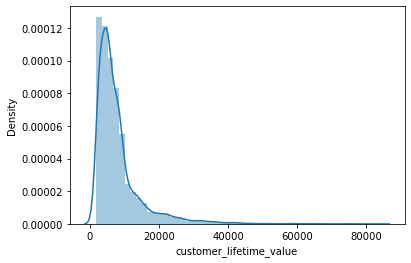

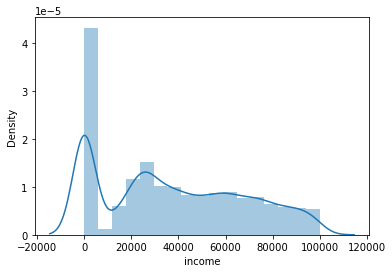

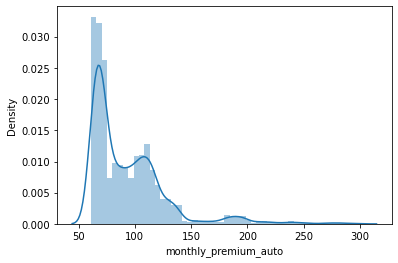

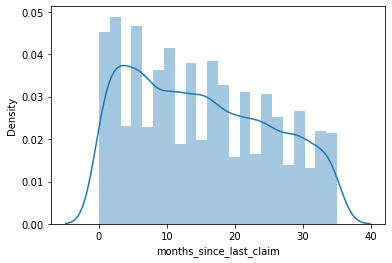

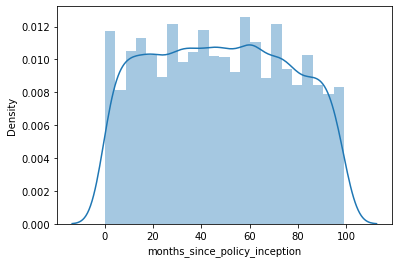

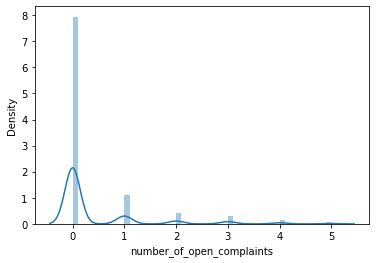

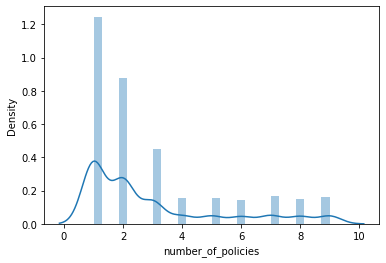

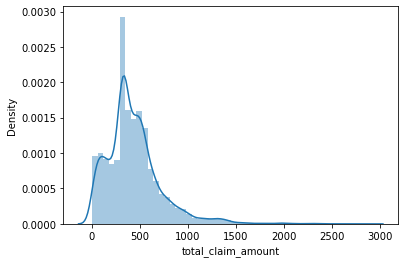

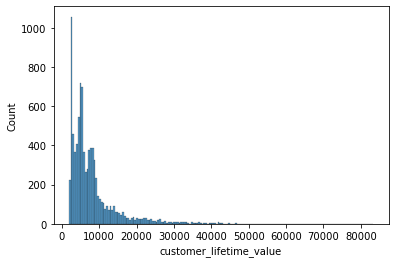

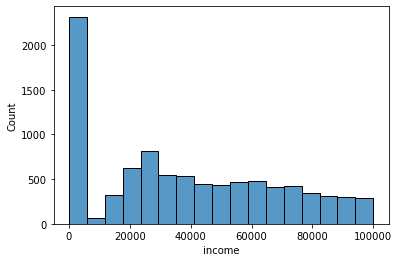

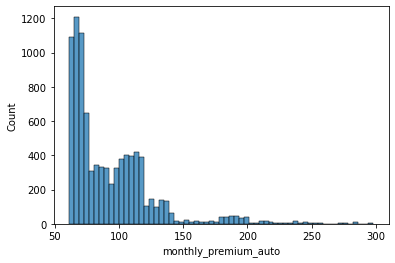

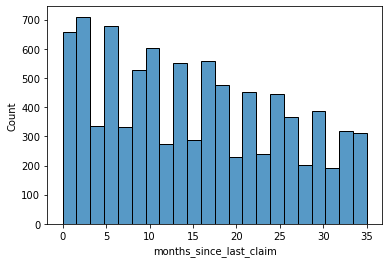

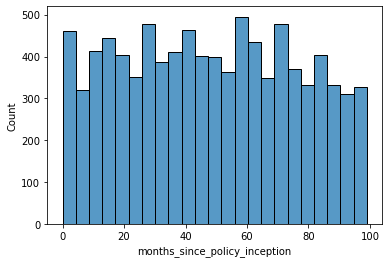

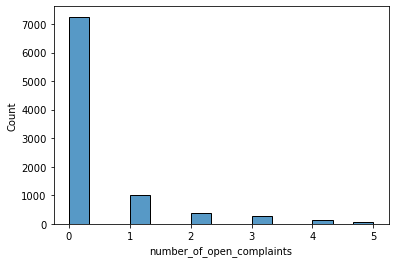

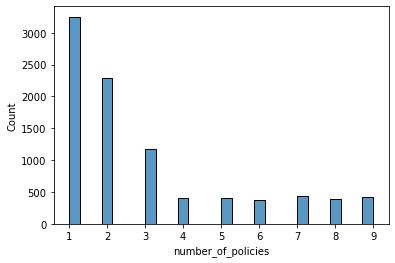

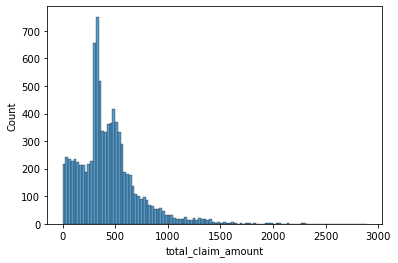

In [45]:
# Use seaborn library to construct distribution plots for the numerical variables

%matplotlib inline

for column in X_num.columns:
    sns.distplot(X_num[column])
    plt.show()

for column in X_num.columns:
    sns.histplot(X_num[column])
    plt.show()
   

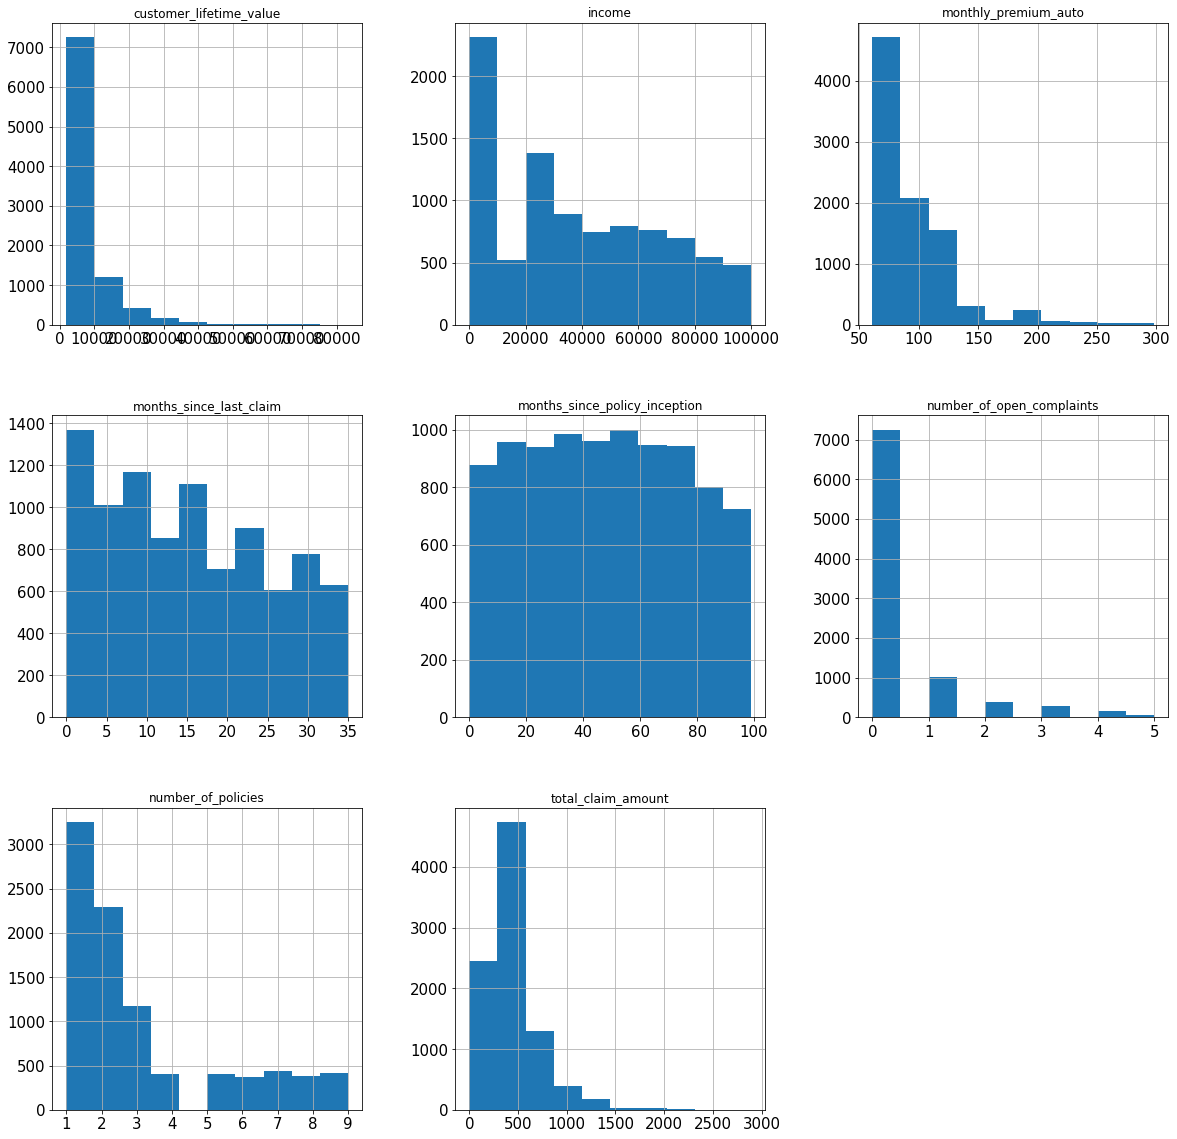

In [46]:
# Use Matplotlib to construct histograms

X_num.hist(xlabelsize = 15, ylabelsize = 15, figsize = (20,20))
plt.show()

In [47]:
y = df['total_claim_amount']  #we select a column which we define as target
X = df.drop(['total_claim_amount'], axis=1)  #we define the input with dataframe content except the target

In [48]:
#Normalizing numerical data

from sklearn.preprocessing import Normalizer

transformer=Normalizer().fit(X_num)
X_normalized=transformer.transform(X_num)
X_normalized = pd.DataFrame(X_normalized)
X_normalized.columns = X_num.columns

In [49]:
X_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
9129,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
9130,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
9131,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
9132,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786


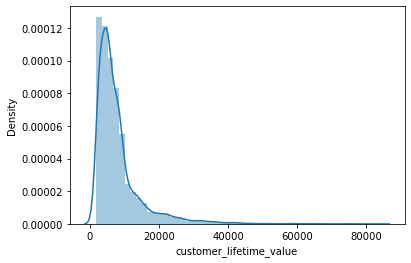

In [50]:
sns.distplot(X_num['customer_lifetime_value'])
plt.show()


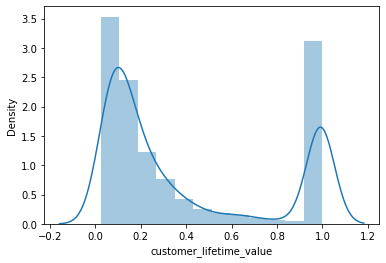

In [51]:
sns.distplot(X_normalized['customer_lifetime_value'])
plt.show()